In [65]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [66]:
def gen_data(n):
    x = np.random.rand(n,1)
    error = np.random.randn(n,1)*0.3
    y = np.sin(2*np.pi*x) + error
    return x,y

In [67]:
def gauss_kernel(x,tau):
    kernel_size = x.shape[0]
    kernel = np.zeros([kernel_size,kernel_size])
    for i in range(kernel_size):
        for j in range(kernel_size):
            kernel[i,j] = np.exp(-tau *sum((x[i]-x[j])**2))
    return kernel

In [68]:
def Kernel_Ridge_Reg(x,y,K,ld,n):
    alpha = la.pinv(K + ld* np.eye(n)).dot(y)
    yhat = K.dot(alpha)
    return  yhat

In [69]:
#示例1
if __name__=='__main__':
    n = 100
    x,y = gen_data(n)
    tau=1
    K = gauss_kernel(x,tau)
    ld = 0.01
    yhat = Kernel_Ridge_Reg(x,y,K,ld,n)

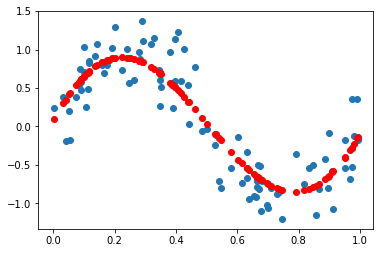

In [70]:
plt.plot(x,y,'o')
plt.plot(x,yhat,'ro')

In [71]:
#示例2
#predict house rent price with Kernel_Ridge_Regression
import pandas as pd
import os
path = r'D:\建模2019\rental-prediction-master\data'
os.chdir(path)
train_df = pd.read_csv('train.csv')

In [72]:
train_df.head()

,RentRoom,Height,TolHeight,RoomArea,Bedroom,Livingroom,Bathroom,Rental
0,0.007812,0,0.236364,0.020854,3,2,2,3.904924
1,0.007812,2,0.090909,0.010924,2,1,1,2.546689
2,0.011719,2,0.090909,0.010924,2,1,1,2.546689
3,0.011719,0,0.181818,0.014040,2,1,1,4.244482
4,0.011719,0,0.181818,0.014040,2,1,1,3.904924


In [90]:
if __name__=='__main__':
    tau=25
    ld = 0.01
    features = ['RentRoom','Height','TolHeight','RoomArea','Bedroom','Livingroom','Bathroom']
    n = train_df[features].values.shape[0]
    K = gauss_kernel(train_df[features].values,tau)
    yhat = Kernel_Ridge_Reg(train_df[features].values,train_df['Rental'].values,K,ld,n)
   

In [91]:
#误差衡量
rmse = np.sqrt(np.sum((yhat - train_df['Rental'].values)**2)/n)

In [89]:
rmse

1.1885919481934937